torch.Size([1140, 600])
torch.Size([570, 600])
torch.Size([1140])
torch.Size([570])
[0.99473684 0.99473684 0.99473684 0.99473684 0.99473684 0.99473684
 0.99473684 0.99298246 0.99473684 0.99298246 0.99473684 0.99473684
 0.99473684 0.99473684 0.99473684 0.99473684 0.99473684 0.99473684
 0.99473684 0.99473684]
[0.9874 0.9947 0.9964 1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.    ]


/tmp/ipykernel_8041/1643766975.py:141: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


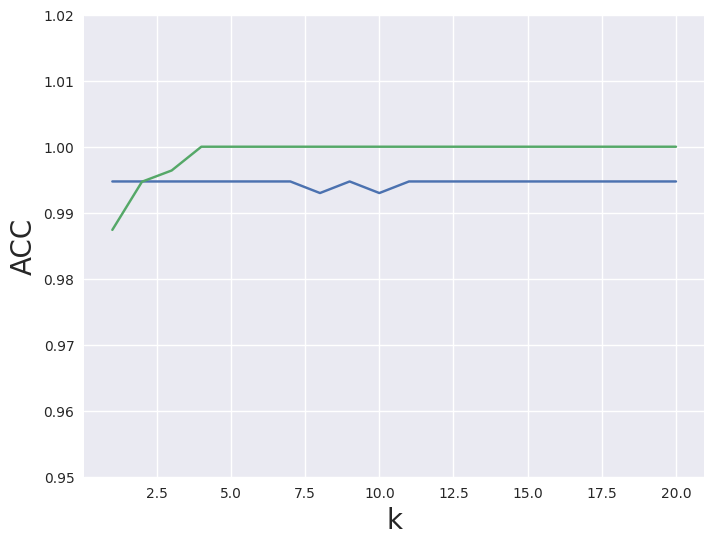

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from Toolkit import *
import sys  
sys.path.append('/root/zqh/filter_test')
from FingerPrint_5_quick import *
from United_model import *
# 数据
Pathlist = [
    '/root/zqh/NewDataSet/BCG_ZQH2.pt',
    '/root/zqh/NewDataSet/BCG_QJF1.pt',
    '/root/zqh/NewDataSet/BCG_WCM1.pt',
    '/root/zqh/NewDataSet/New_data_pa1.pt',
    '/root/zqh/NewDataSet/New_data_pa2.pt',
    '/root/zqh/NewDataSet/New_data_pa3.pt',
    '/root/zqh/NewDataSet/New_data_pa5.pt',
    '/root/zqh/NewDataSet/New_data_pa6.pt',
    '/root/zqh/NewDataSet/New_data_pa7.pt',
    '/root/zqh/NewDataSet/New_data_pa8.pt',
    '/root/zqh/NewDataSet/New_data_pa9.pt',
    '/root/zqh/NewDataSet/New_data_pa10.pt',
    '/root/zqh/NewDataSet/New_data_pa11.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa12.pt',
    '/root/zqh/NewDataSet/New_data_pa13.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa14.pt',
    '/root/zqh/NewDataSet/New_data_pa15.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa16.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa17.pt',
    '/root/zqh/NewDataSet/New_data_pa18.pt',
    '/root/zqh/NewDataSet/New_data_pa19.pt',
    '/root/zqh/NewDataSet/New_data_pa20.pt',
    '/root/zqh/NewDataSet/New_data_pa21.pt',
    '/root/zqh/NewDataSet/New_data_pa22.pt',
    '/root/zqh/NewDataSet/New_data_pa23.pt',
    '/root/zqh/NewDataSet/New_data_pa24.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa25.pt',
    '/root/zqh/NewDataSet/New_data_pa26.pt',
    '/root/zqh/NewDataSet/New_data_pa27.pt',
    '/root/zqh/NewDataSet/New_data_pa28.pt',
    '/root/zqh/NewDataSet/New_data_pa29.pt',
    '/root/zqh/NewDataSet/New_data_pa30.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa31.pt',
    '/root/zqh/NewDataSet/New_data_pa32.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa33.pt',
    '/root/zqh/NewDataSet/New_data_pa34.pt',
    '/root/zqh/NewDataSet/New_data_pa35.pt',
    '/root/zqh/NewDataSet/New_data_pa36.pt',
    '/root/zqh/NewDataSet/New_data_pa37.pt',
    '/root/zqh/NewDataSet/New_data_pa38.pt',
    '/root/zqh/NewDataSet/New_data_pa39.pt',
    '/root/zqh/NewDataSet/New_data_pa40.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_caoan615.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_dj613.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_dxt613.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_ltm613.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_qjf612.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_rrx613.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_sample1.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_sjj612.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_tt612.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_wcm612.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_wg613.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_whd612.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_wxy.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_zj612.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_zqh1.pt',
    '/root/zqh/BCGDataSet/modify_extract_Single_resolution_zzp612.pt',
]
oneperson_begin = 0
oneperson_end = 30
oneperson_nums = oneperson_end - oneperson_begin
persons = len(Pathlist)
data = get_ResUnet_data(Pathlist=Pathlist, oneperson_begin=oneperson_begin, oneperson_end=oneperson_end)[:,:,:].detach()
label = torch.zeros(oneperson_nums*persons)
for i in range(persons):
    label[i*oneperson_nums:(i+1)*oneperson_nums] = i

# 数据对齐
Unite_model = torch.load('/root/zqh/Save_Model/United_model_device.pth').cuda().eval()
feature1, ans, feature2 = Unite_model(data.cuda())
features = feature2
data = features
# persons = int(data.shape[0]/oneperson_nums)
# data = data.cuda()
# # Metric_learning
# Metric_model = torch.load('/root/zqh/Save_Model/train_Metric_Model_local.pth').cuda().eval()
# length = data.shape[0]
# output1 = Metric_model(data)  # 度量学习
# data = output1

def splitDataSet(data, label, persons, oneperson_nums): # 要求输入 shape: N x
    X_train = data[0:20,:]
    X_test = data[20:30,:]
    y_train = label[0:20]
    y_test = label[20:30]
    for i in range(1,persons):
        X_train = torch.cat([X_train, data[oneperson_nums*i:oneperson_nums*i+20,:]],dim=0)
        X_test = torch.cat([X_test, data[oneperson_nums*i+20:oneperson_nums*i+30,:]],dim=0)
        y_train = torch.cat([y_train, label[oneperson_nums*i:oneperson_nums*i+20]],dim=0)
        y_test = torch.cat([y_test, label[oneperson_nums*i+20:oneperson_nums*i+30]],dim=0)
    return X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = train_test_split(data.cpu().squeeze(1), label, stratify=label, random_state=42)
X_train, X_test, y_train, y_test = splitDataSet(data.cpu().squeeze(1), label, persons, oneperson_nums)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

def MyKNN(persons, X_train, X_test, y_train, y_test, k):
    right = 0
    for i in range(X_test.shape[0]):
        tmp = X_test[i].repeat(X_train.shape[0], 1)
        distancelist = torch.sum((tmp-X_train)**2,dim=1)
        distancelist = torch.cat([distancelist.unsqueeze(1), y_train.unsqueeze(1)],dim=1)
        distancelist = distancelist.tolist()
        distancelist = sorted(distancelist, key = lambda x:(x[0]))
        distancelist = np.array(distancelist)
        distancelist = distancelist[:k,1:2]
        record = torch.zeros(persons)
        for j in range(k):
            record[int(distancelist[j][0])] += 1
        maxvalue,maxindex = torch.max(record,dim=0)
        if maxindex == y_test[i]:
            right+=1
    return right/y_test.shape[0]
list = []
k_range = 21
for i in range(1, k_range):
    ans = MyKNN(persons, X_train, X_test, y_train, y_test, k=i)
    list.append(ans)
arraylist = np.array(list)
print(arraylist)
ourans = np.array([0.9874, 0.9947, 0.9964, 1.0, 1.0,
                   1.0, 1.0, 1.0, 1.0, 1.0,
                   1.0, 1.0, 1.0, 1.0, 1.0,
                   1.0, 1.0, 1.0, 1.0, 1.0,])
print(ourans)
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(8, 6), dpi=100)
x = torch.arange(1, k_range)
plt.plot(x.numpy(), arraylist)
plt.plot(x.numpy(), ourans)
plt.ylim(0.95, 1.02)
plt.xlabel('k', fontsize=20)
plt.ylabel('ACC', fontsize=20)
plt.show()
# plt.savefig('learning_curve_picture.jpeg')